<a href="https://colab.research.google.com/github/jww2145/heart-disease/blob/main/Heart_Disease_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proposal**

We plan on using [this](https://https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci) dataset found on Kaggle regarding the presence of heart disease of 297 patients in a Cleaveland Clinic. In the introductory paper, led by Professor Robert Detrano, it was mentioned the Kaggle dataset was used to compare actual presence of heart disease in patients with results gained from applying a Bayesian algorithm. Our first step was utilizing a Random Forest Classification to see if our model could start to predict the presence of heart disease from the variables.

In [77]:
# Data Processing Tools
import pandas as pd
import numpy as np
import random

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import matplotlib.pyplot as plt

In [78]:
#import kaggle dataset

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Heart Disease/heart_cleveland_upload.csv')

df = df.rename(columns={"age": "Age", "sex" : "Sex", "cp" : "Chest Pain Type", "trestbps" : "Resting Blood Pressure", "chol" : "Serum Cholestoral" ,
                   "fbs" : "Fasting Blood Pressure", "restecg" : "Electrocardiographic Results", "thalach" : "Maximum Heart Rate",
                   "exang" : "Exercise Pain", "oldpeak" : "Stress Test Depression", "slope" : "Slope", "ca" : "Major Vessels",
                   "thal" : "Thallium Heart Rate", "condition" : "Condition"})

df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Sex,Chest Pain Type,Resting Blood Pressure,Serum Cholestoral,Fasting Blood Pressure,Electrocardiographic Results,Maximum Heart Rate,Exercise Pain,Stress Test Depression,Slope,Major Vessels,Thallium Heart Rate,Condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


To read more about the attributes, one can refer to the original documentation [here](https://libres.uncg.edu/ir/ecsu/f/Brandon_Simmons_Thesis-Final.pdf) on page 11.

In [79]:
# Defining features and target

X = df.drop('Condition',axis = 1)
y = df['Condition']


In [80]:
# split data into random train and test subsets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [81]:
# Creating the random forests with 18 trees, which is the sqrt of 297 rounded up.

feature_names = [df.columns[i] for i in range(X.shape[1])]
rf = RandomForestClassifier(n_estimators=18)
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=18)

In [86]:
accuracy = precision = recall = 0
for i in range(10000):
  y_pred = rf.predict(X_test)

  accuracy += accuracy_score(y_test, y_pred)
  precision += precision_score(y_test, y_pred)
  recall += recall_score(y_test,y_pred)


print("Accuracy:", accuracy / 10000)
print("Precision:", precision / 10000)
print("Recall:", recall / 10000)

Accuracy: 0.8500000000001575
Precision: 0.75
Recall: 0.8571428571429515


Here is one example of our decision tree:



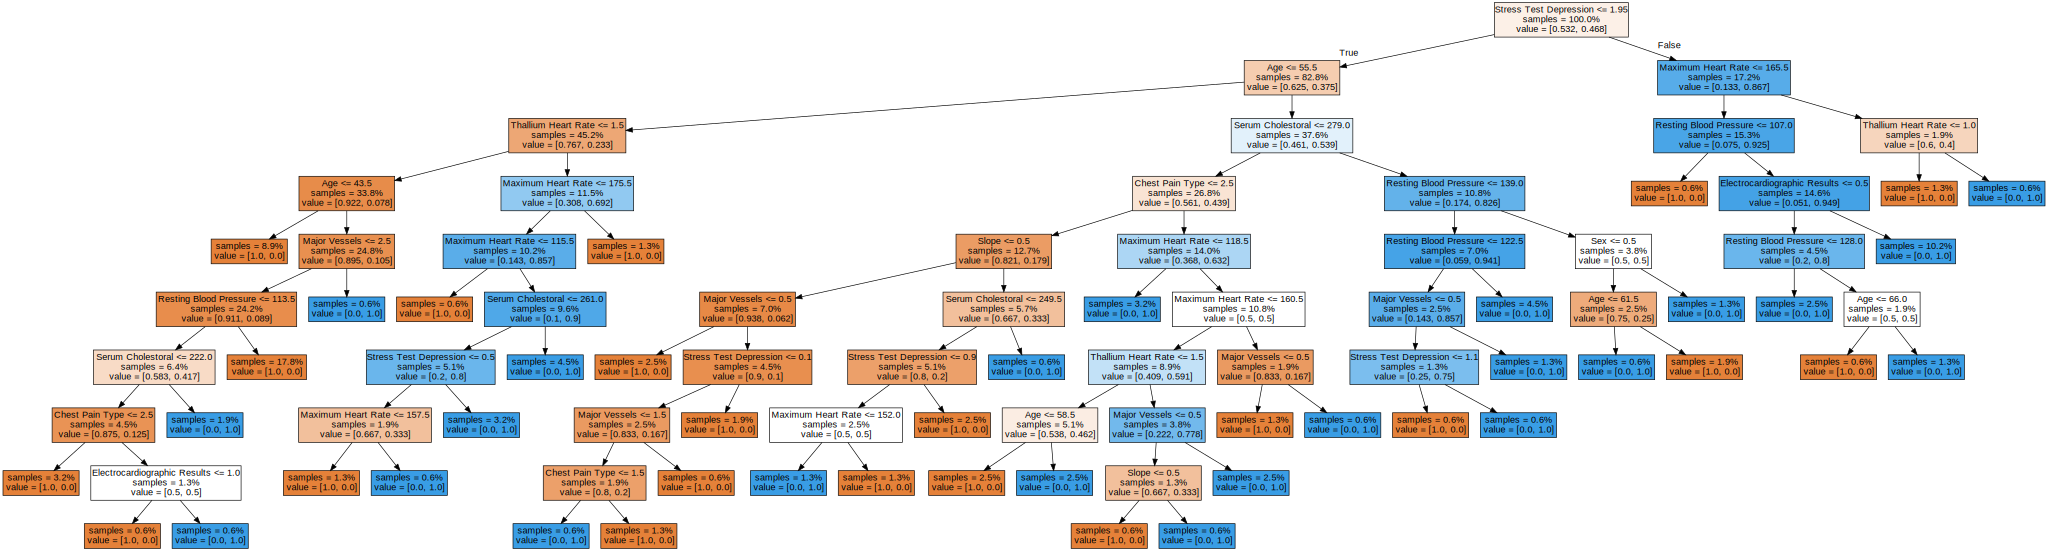

In [85]:
j = random.randrange(18)

tree = rf.estimators_[j]
dot_data = export_graphviz(tree,
                            feature_names=X_train.columns,
                            filled=True,
                            max_depth=17,
                            impurity=False,
                            proportion=True)
graph = graphviz.Source(dot_data)
display(graph)


In Brandon Simmons's original study, the Model Classification Testing (Section 4.2.2) had an accuracy score of 70%, with a precision rate of 71% and a recall rate of 60%.

Thus, our random forest model performed better than the study's original Confusion matrix. Across 1000 trials on the Cleaveland dataset, our accuracy score was 85%, our precision was 75% and our Recall was 85.71%.


In [70]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

In the original study, Simmons found that the 6 most important features in order to help improve the classification rate was: thalarch (Maximum Heart Rate), oldpeak (Stress Test Depression), cp (Chest Pain Type), age (Age), chol (Serum Cholestoral), trestbps (Resting Blood Pressure).

In comparison, our six most important features was:



1.   cp (Chest Pain Type)
2.   thal (Thallium Heart Rate)
3.  thalarch (Maximum Heart Rate)
4. ca (Major Vessels)
5. oldpeak (Stress Test Depression)
6. trestbps (Resting Blood Pressure)



<Axes: ylabel='allvarlist'>

<Figure size 1400x1600 with 0 Axes>

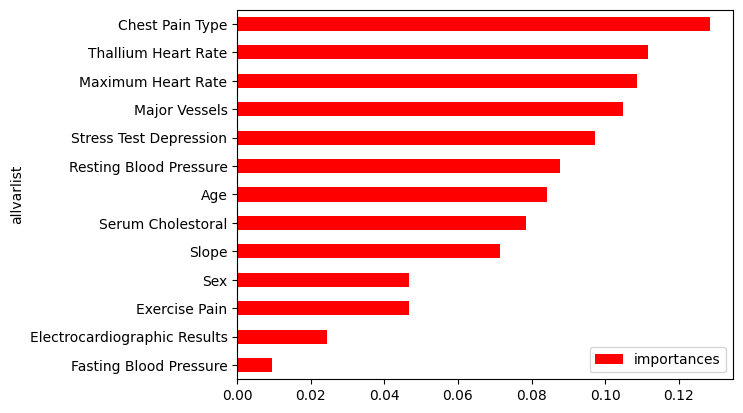

In [87]:
forest_importances = pd.Series(importances, index=feature_names)

plt.figure(figsize=(14,16))
df3=pd.DataFrame({'allvarlist':feature_names,'importances':forest_importances})
df3.sort_values('importances',inplace=True)
df3.plot(kind='barh',y='importances',x='allvarlist',color='r')